In [3]:
# -*- coding: utf-8 -*-

import os

from tensorflow.keras import layers
from tensorflow.keras import Model

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.densenet import DenseNet201
from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras.optimizers import RMSprop,Adam


In [4]:
pre_trained_model_2 = DenseNet201(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3))

# pre_trained_model_2.summary()



Instructions for updating:
If using Keras pass *_constraint arguments to layers.
74842112/74836368 [==============================] - 2s 0us/step


In [5]:
x = layers.GlobalAveragePooling2D()(pre_trained_model_2.output)
x = layers.Dropout(0.2)(x)
x = layers.BatchNormalization()(x)
x = layers.Dense  (1, activation='sigmoid')(x)

model = Model( pre_trained_model_2.input, x) 

model.compile(optimizer = Adam(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
train_dir = "/content/data/train/"
test_dir = "/content/data/validation/"

train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )


# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 10,
                                                    class_mode = 'binary',
                                                    target_size = (224, 224))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( test_dir,
                                                          batch_size  = 10,
                                                          class_mode  = 'binary',
                                                          target_size = (224, 224))


Found 1000 images belonging to 2 classes.
Found 273 images belonging to 2 classes.


In [9]:
filepath="/content/weights_best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')


history = model.fit_generator(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 50,
            epochs = 20,
            validation_steps = 10,
            verbose = 2,
            callbacks=[checkpoint])

Epoch 1/20
Epoch 1/20

Epoch 00001: val_acc improved from -inf to 0.61000, saving model to /content/weights_best.hdf5
50/50 - 229s - loss: 0.1950 - acc: 0.9240 - val_loss: 1.6428 - val_acc: 0.6100
Epoch 2/20
Epoch 1/20

Epoch 00002: val_acc improved from 0.61000 to 0.67000, saving model to /content/weights_best.hdf5
50/50 - 17s - loss: 0.1895 - acc: 0.9260 - val_loss: 1.0583 - val_acc: 0.6700
Epoch 3/20
Epoch 1/20

Epoch 00003: val_acc did not improve from 0.67000
50/50 - 15s - loss: 0.1480 - acc: 0.9500 - val_loss: 1.9618 - val_acc: 0.6000
Epoch 4/20
Epoch 1/20

Epoch 00004: val_acc improved from 0.67000 to 0.91000, saving model to /content/weights_best.hdf5
50/50 - 18s - loss: 0.1752 - acc: 0.9280 - val_loss: 0.2935 - val_acc: 0.9100
Epoch 5/20
Epoch 1/20

Epoch 00005: val_acc did not improve from 0.91000
50/50 - 15s - loss: 0.1363 - acc: 0.9520 - val_loss: 1.7526 - val_acc: 0.6300
Epoch 6/20
Epoch 1/20

Epoch 00006: val_acc did not improve from 0.91000
50/50 - 16s - loss: 0.0882 - a

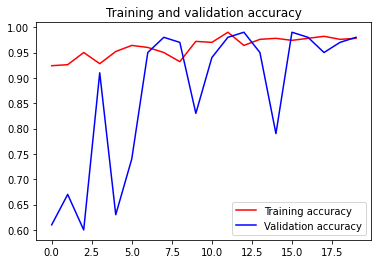

<Figure size 432x288 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()